In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline


In [2]:
import numpy
import pylab as plt
import os
import sys
import math


### High Voltage Arcing model and FFT Analysis
- Assume a simple arcing model in which insulation breaks down under high potential
- Assume a simple model like:
\begin{equation}
R = R_0 - a \cdot abs(V)
\end{equation}

So that the effective resistance $R$ of a wire decreases with increasign potebtial $V$. This can be thought of as opening arcing channels to ground, which act as parallel circuits, effectively reducing the overall resistance of the circuit.

The question at hand is -- assuming this simple model, can we detect this behavior based on characteristics of the signal's Fourier spectrum? In particular, can we identify the behavior based on the prevalence of odd and even Fourier components -- where odd (even) components are components whose frequence is an odd (even) integer multiple of the fundamental frequency?

We start with the model (see f_simple_ohm_I() and f_lin_ohm_I() variants of Ohm's law below). We compute a normal-Ohm sequence and compare to a linear-Ohm sequence.

We then show two examples of superposition: A signal with one or more odd-integer modes added to the fundamental mode and a signal with one or more even-integer modes added to the fundamental mode.



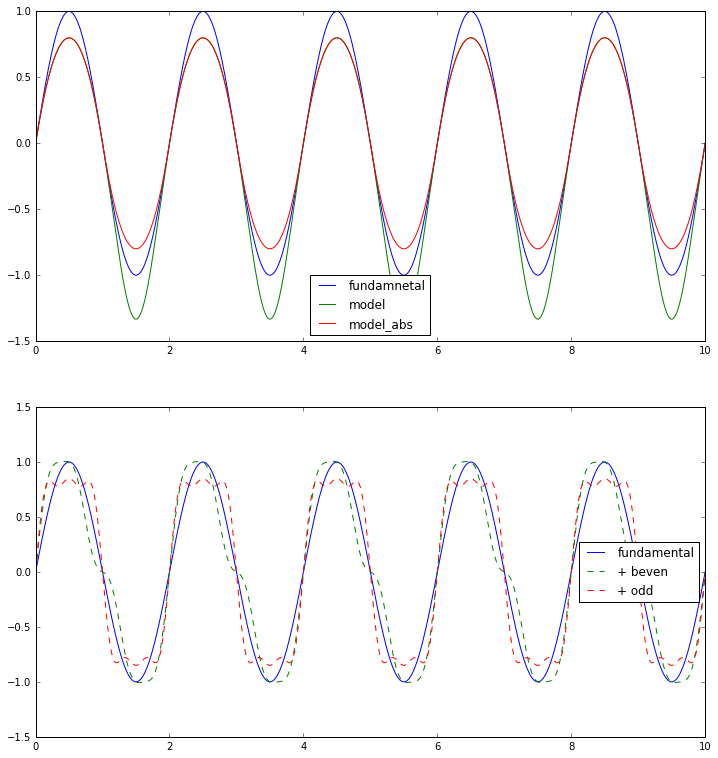

In [3]:
def f_simple_ohm_I(v,R=1.):
    return v/R
#
def f_lin_ohm_I(v,R0=1., alpha=0.):
    #return v/(R0 + alpha*numpy.abs(v))
    return v/(R0 + alpha*v)

#
def f_lin_ohm_I_abs(v,R0=1., alpha=0.):
    return v/(R0 + alpha*numpy.abs(v))
    #return v/(R0 + alpha*v)
#
X = numpy.linspace(0., 5*2.0, 100000)
#
plt.figure(figsize=(12,13))
plt.clf()
n_cls = 1
n_rws = 2
ax1 = plt.subplot('{}{}1'.format(n_rws, n_cls))
ax2 = plt.subplot('{}{}2'.format(n_rws, n_cls))
#ax3 = plt.subplot('{}{}3'.format(n_rws, n_cls))
#
j=1.
Y_v = numpy.sin(1.*X*math.pi)
#
Y0 = f_simple_ohm_I(Y_v)
Y1 = f_lin_ohm_I(Y_v, alpha=.25)
Y1_abs = f_lin_ohm_I_abs(Y_v, alpha=.25)
ax1.plot(X, Y0, label='fundamnetal')
ax1.plot(X, Y1, label='model')
ax1.plot(X, Y1_abs, label='model_abs')
ax1.legend(loc=0)
#
Y_sp_ev = Y_v + .25*numpy.sin(2.*X*math.pi) + .1*numpy.sin(4.*X*math.pi)
Y_sp_odd = Y_v + .25*numpy.sin(3.*X*math.pi) + .1*numpy.sin(5.*X*math.pi)
#
ax2.plot(X, Y0, label='fundamental')
ax2.plot(X, Y_sp_ev, '--', label='+ beven')
ax2.plot(X, Y_sp_odd, '--', label='+ odd')
#
ax2.legend(loc=0)

### Do some FFTs:
- make a new copy of the data that spans many periods, so we can get a good FFT.
- Take FFTs of the model sequences and compare the spectra

- Our "model" sequence (with variable R = R(V)) decomposes into a summation of the odd modes, so nominally, we should be able to detect this arcing phenomena, as we have modeled it, by identifying signals that contain a prevalence of odd modes. 
- Before drawing any strong conclusions, however, we need to further validate the model. Other elements might be more critical.
   - How, specifically, does this phenomenon affect measurements of $V$ and $I$?
   - Is the phenomena symmetric about the sinusoidal peak, or does it tend to occur on the leading/trailing side?
   - What other phenomena might produce a similar FFT signature?

As an example, we also consider the asymmetrical model,

\begin{equation}
R = R_0 - a \cdot V
\end{equation}

so that arcing (or a similar process) occurs only for positive (or negative) volgates. This results in a shift of the signal, whereas the $abs(V)$ model results in a "squasing."

Note this assymetrical variant of the model results in a prevalence of $even$ modes.

In summary then,
- The assymeric model, aka $R ~ V$ results in a prevalence of $even$ modes
- The symmetric model, aka, $R ~ abs(V)$ results in a prevalence of $odd$ modes.



In [4]:
X = numpy.linspace(0., 100*2.0, 1000000)
#

#
j=1.
Y_v = numpy.sin(1.*X*math.pi)
#
Y0 = f_simple_ohm_I(Y_v)
Y1 = f_lin_ohm_I(Y_v, alpha=.25)
Y1_abs = f_lin_ohm_I_abs(Y_v, alpha=.25)
#
#Y_sp_ev = Y_v + .25*numpy.sin(2.*X*math.pi) + .1*numpy.sin(4.*X*math.pi) + .1*numpy.sin(6.*X*math.pi)
#Y_sp_odd = Y_v + .25*numpy.sin(3.*X*math.pi) + .1*numpy.sin(5.*X*math.pi)  + .1*numpy.sin(7.*X*math.pi)
Y_sp_ev = numpy.sin(2.*X*math.pi) + .1*numpy.sin(4.*X*math.pi) + .1*numpy.sin(6.*X*math.pi) + .1*numpy.sin(8.*X*math.pi)  
Y_sp_odd = numpy.sin(1.*X*math.pi) + .25*numpy.sin(3.*X*math.pi) + .1*numpy.sin(5.*X*math.pi) + .1*numpy.sin(7.*X*math.pi)  
#
'''
plt.figure(figsize=(18,4))
plt.clf()
n_cls = 1
n_rws = 2
ax1 = plt.subplot('{}{}1'.format(n_rws, n_cls))
ax2 = plt.subplot('{}{}2'.format(n_rws, n_cls))

ax1.plot(X, Y0)
ax1.plot(X, Y1)

ax2.plot(X, Y0)
ax2.plot(X, Y_sp_ev, '--', label='even')
ax2.plot(X, Y_sp_odd, '--', label='odd')
#
ax2.legend(loc=0)
'''


"\nplt.figure(figsize=(18,4))\nplt.clf()\nn_cls = 1\nn_rws = 2\nax1 = plt.subplot('{}{}1'.format(n_rws, n_cls))\nax2 = plt.subplot('{}{}2'.format(n_rws, n_cls))\n\nax1.plot(X, Y0)\nax1.plot(X, Y1)\n\nax2.plot(X, Y0)\nax2.plot(X, Y_sp_ev, '--', label='even')\nax2.plot(X, Y_sp_odd, '--', label='odd')\n#\nax2.legend(loc=0)\n"

/home/myoder/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
/home/myoder/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/myoder/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in true_divide
/home/myoder/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
/home/myoder/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/myoder/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


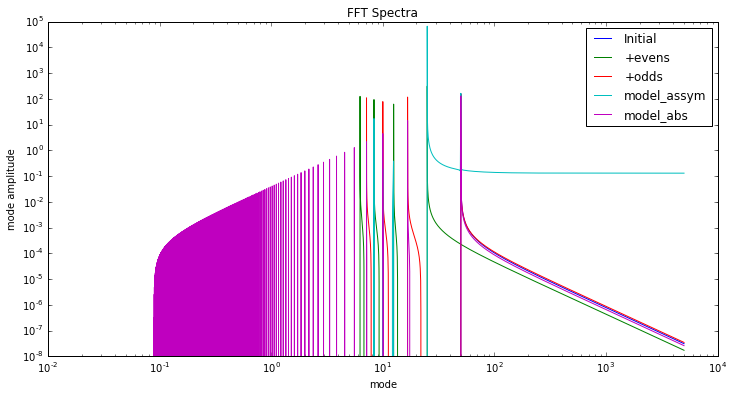

In [5]:
fft_0    = numpy.fft.fft(Y0)
fft_even = numpy.fft.fft(Y_sp_ev)
fft_odd  = numpy.fft.fft(Y_sp_odd)
#
fft_model = numpy.fft.fft(Y1)
fft_model_abs = numpy.fft.fft(Y1_abs)

n_modes = int(.5*len(X))
plt.figure(figsize=(12,6))
plt.clf()
ax1 = plt.subplot('111')
#ax2 = plt.subplot('212')
#
ax1.plot(1./X[0:n_modes], fft_0[0:n_modes], label='Initial', zorder=4)
ax1.plot(1./X[0:n_modes], fft_even[0:n_modes], label='+evens', zorder=4)
ax1.plot(1./X[0:n_modes], fft_odd[0:n_modes], label='+odds', zorder=4)
#
ax1.plot(1./X[0:n_modes], fft_model[0:n_modes], label='model_assym', zorder=5)
ax1.plot(1./X[0:n_modes], fft_model_abs[0:n_modes], label='model_abs', zorder=5)
#
ax1.legend(loc=0)
ax1.set_yscale('log')
ax1.set_xscale('log')
#
ax1.set_title('FFT Spectra')
ax1.set_xlabel('mode')
ax1.set_ylabel('mode amplitude')
#